In [52]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
%matplotlib inline




In [53]:
#import data
df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [50]:
#data cleaning
df.columns=df.columns.str.replace(' ','_')
df.head(2)


,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [44]:
df.isnull().sum()
#no null values

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(°C)    0
Solar_Radiation_(MJ/m2)      0
Rainfall(mm)                 0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

In [8]:
df.value_counts()

Date        Rented_Bike_Count  Hour  Temperature(°C)  Humidity(%)  Wind_speed_(m/s)  Visibility_(10m)  Dew_point_temperature(°C)  Solar_Radiation_(MJ/m2)  Rainfall(mm)  Snowfall_(cm)  Seasons  Holiday     Functioning_Day
01/01/2018  61                 5     -4.4             54           0.8               1786              -12.3                      0.00                     0.0           0.0            Winter   Holiday     Yes                1
21/04/2018  707                0      16.3            59           0.2               756                8.2                       0.00                     0.0           0.0            Spring   No Holiday  Yes                1
            324                7      12.5            68           1.1               457                6.7                       0.22                     0.0           0.0            Spring   No Holiday  Yes                1
            436                2      14.7            63           1.8               611             

In [51]:
df['Rented_Bike_Count'].value_counts()

Rented_Bike_Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

In [15]:
print(df['Rented_Bike_Count'].max())
print(df['Rented_Bike_Count'].min())
print(df['Rented_Bike_Count'].mean())
print(df['Rented_Bike_Count'].median())

3556
0
704.6020547945205
504.5


In [17]:
def countsplit(df):
    for i in range (8760):
        if df.at[i,'Rented_Bike_Count']<=400:
            df.at[i,'Rented_Bike_Count']=0
        elif df.at[i,'Rented_Bike_Count']>1000:
            df.at[i,'Rented_Bike_Count']=2
        else:
            df.at[i,'Rented_Bike_Count']=1
countsplit(df)

In [18]:
df['Rented_Bike_Count'].value_counts()

Rented_Bike_Count
0    3906
1    2436
2    2418
Name: count, dtype: int64

<Axes: xlabel='Rented_Bike_Count', ylabel='Temperature(°C)'>

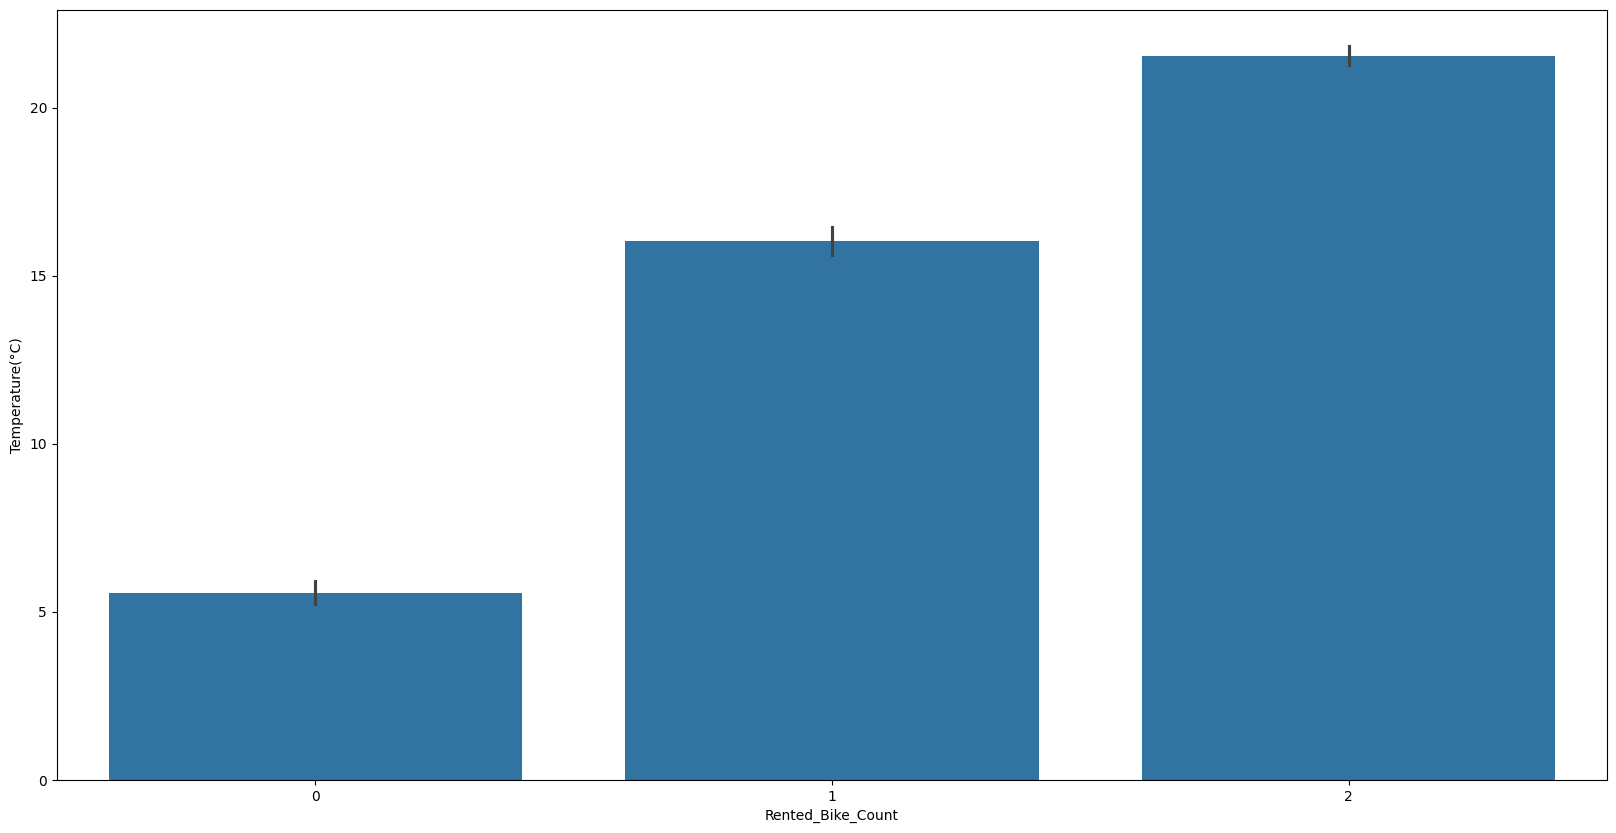

In [20]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='Rented_Bike_Count',y='Temperature(°C)',data=df,ax=ax)
#temperatures are directly proportional to bookings

<Axes: xlabel='Seasons', ylabel='Rented_Bike_Count'>

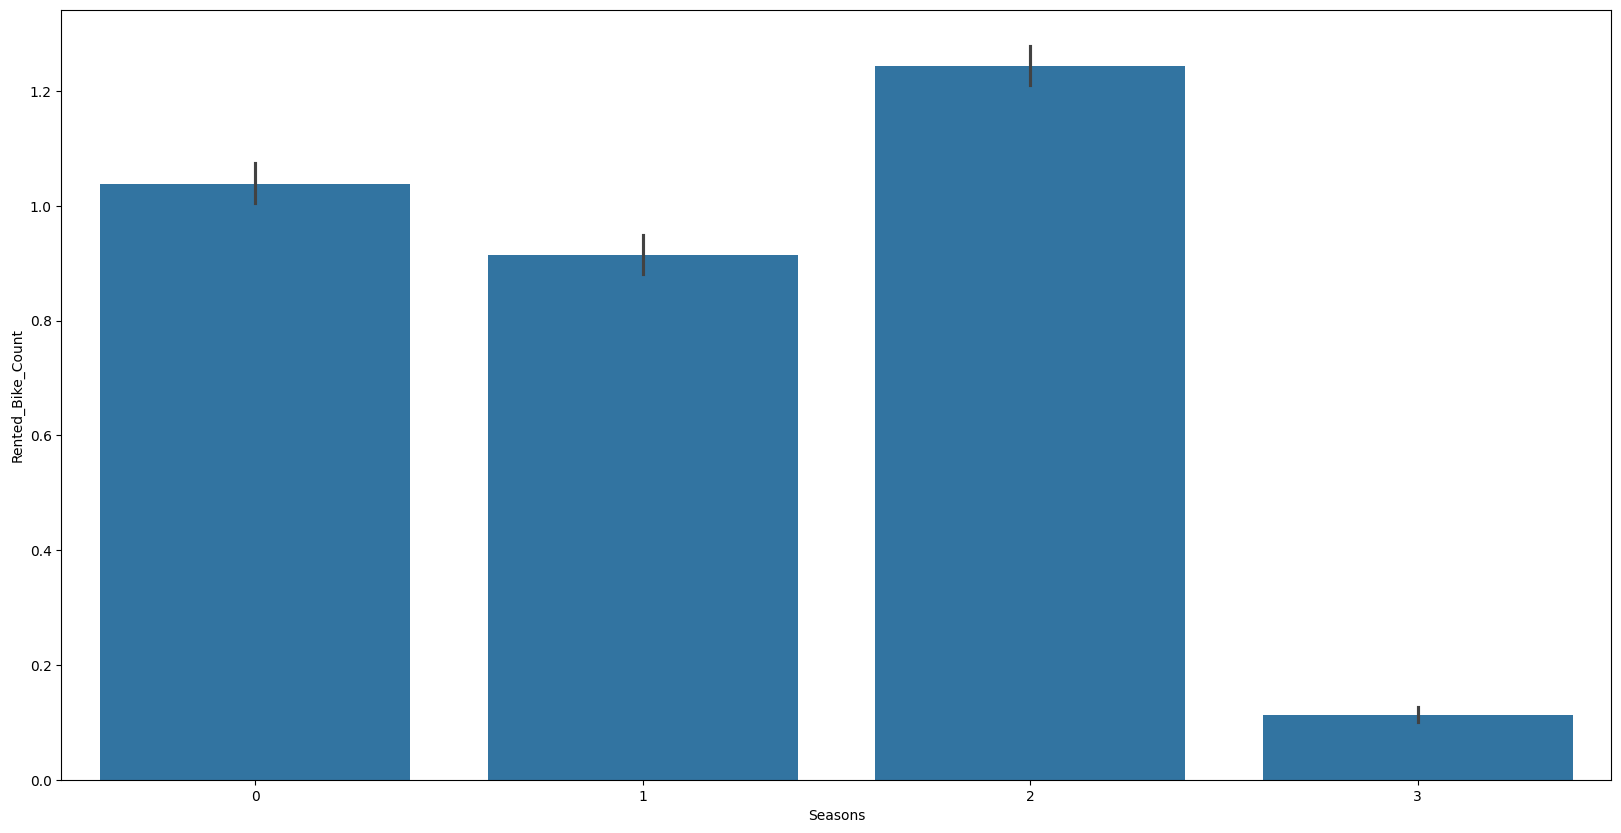

In [42]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='Seasons',y='Rented_Bike_Count',data=df,ax=ax)
# seasons and temperatures are directly proportional to bookings

<Axes: xlabel='Rented_Bike_Count', ylabel='Functioning_Day'>

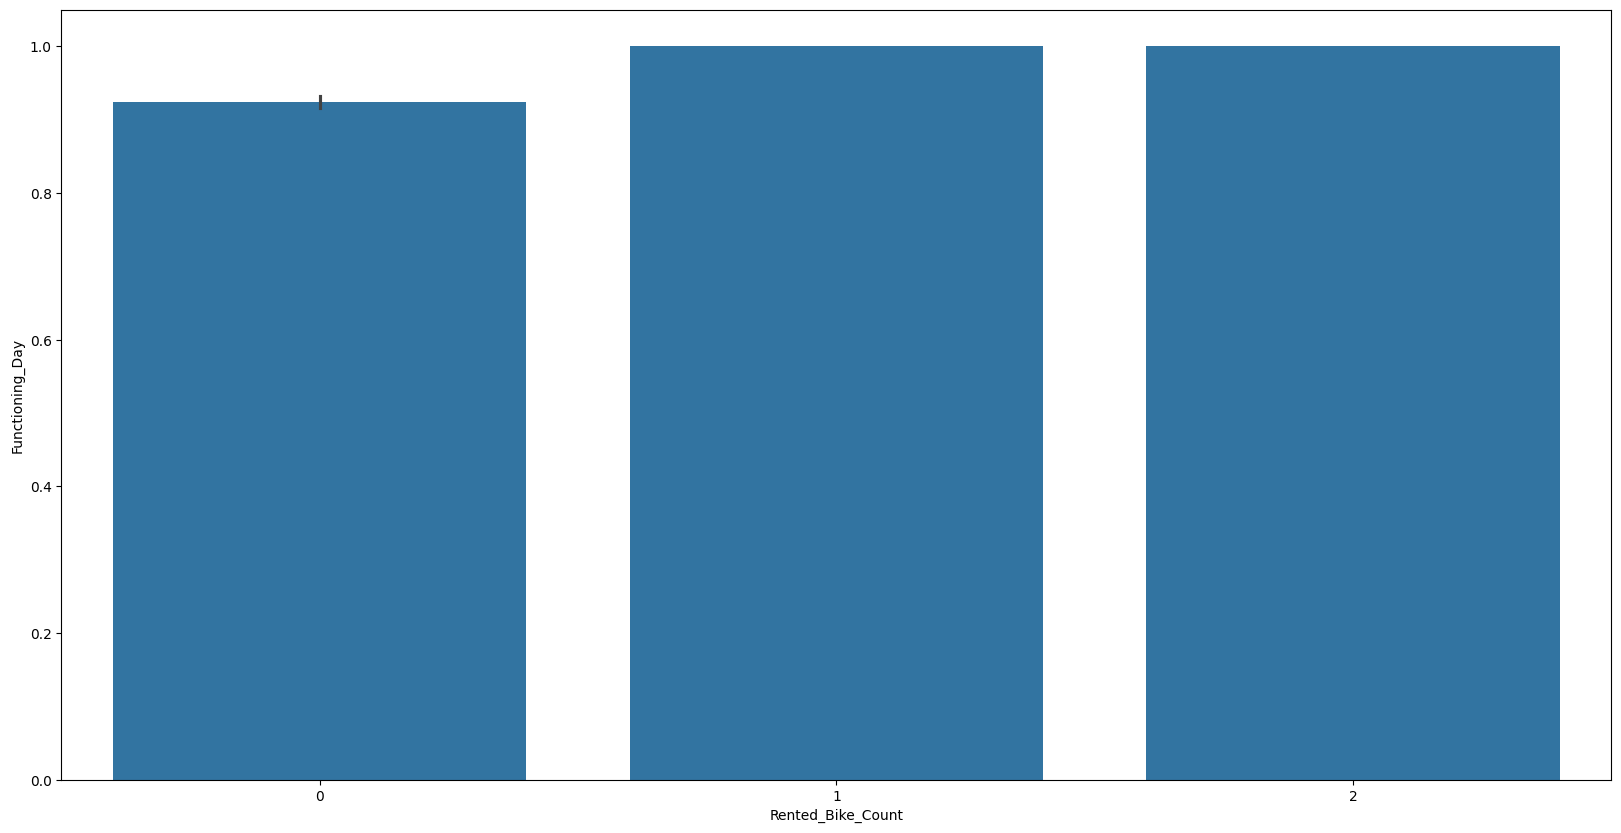

In [40]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='Rented_Bike_Count',y='Functioning_Day',data=df,ax=ax)

<Axes: xlabel='Holiday', ylabel='Rented_Bike_Count'>

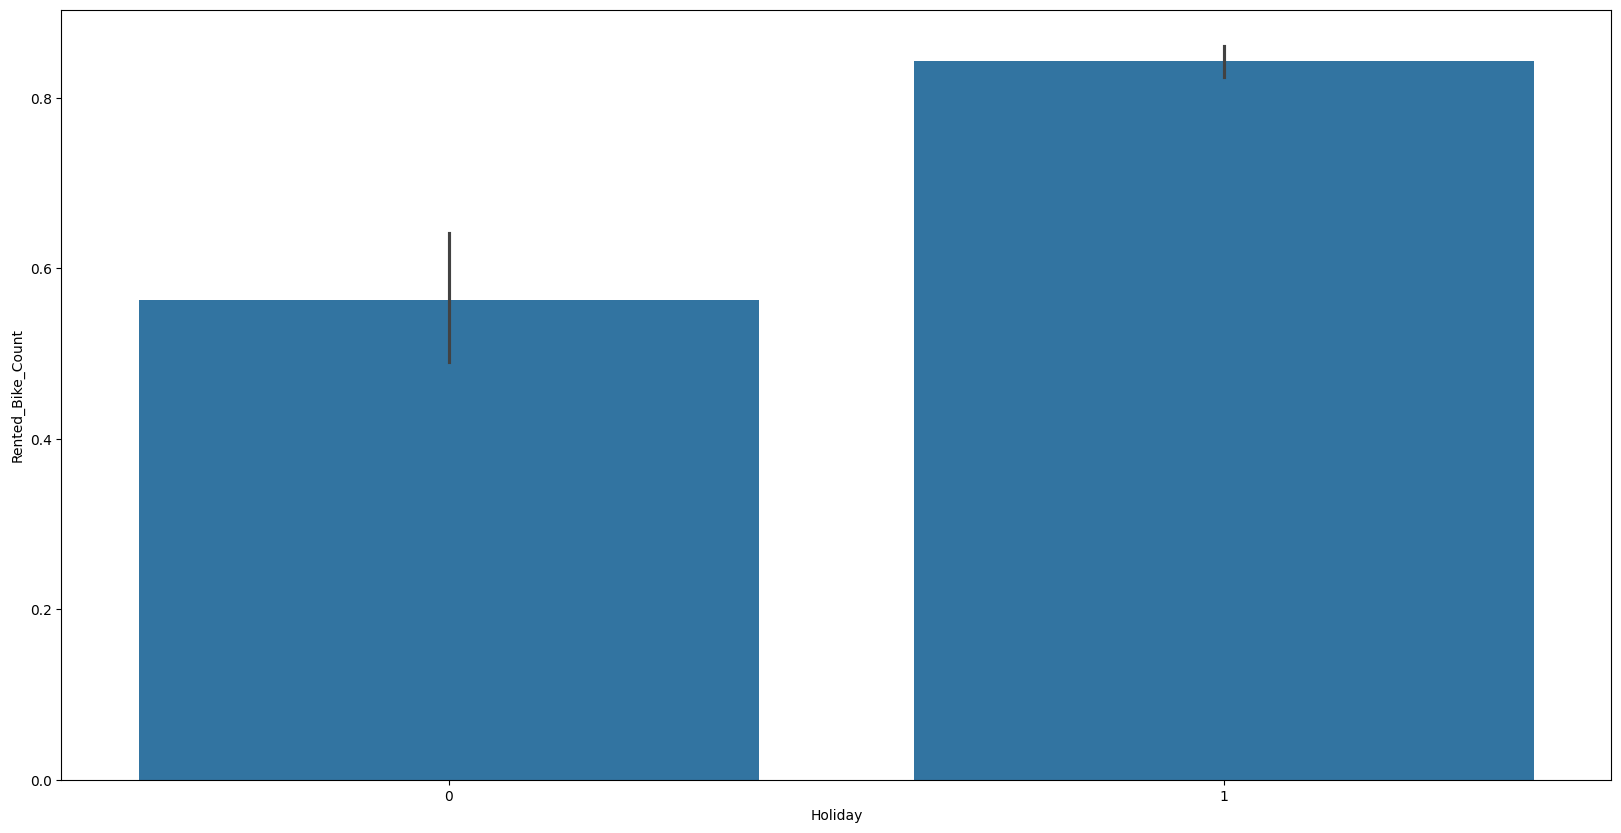

In [47]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='Holiday',y='Rented_Bike_Count',data=df,ax=ax)

In [24]:
l=LabelEncoder()
df['Date']=l.fit_transform(df['Date'])
df['Seasons']=l.fit_transform(df['Seasons'])
df['Holiday']=l.fit_transform(df['Holiday'])
df['Functioning_Day']=l.fit_transform(df['Functioning_Day'])

In [25]:
#model creation
x=df.drop(['Rented_Bike_Count'],axis=1)
y=df['Rented_Bike_Count']

In [29]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
#scaling
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [31]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [32]:
rfc.score(xtest,ytest)

0.8595890410958904

In [33]:
#SVM
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [34]:
svc.score(xtest,ytest)

0.7888127853881278

In [35]:
model=GridSearchCV(svc,{
    'C':[0.1,0.4,0.8,1.0,2.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [36]:
model.fit(xtrain,ytrain)
model.best_params_

{'C': 2.0, 'gamma': 0.4, 'kernel': 'rbf'}

In [37]:
sv2=SVC(
    C=2.0 ,
    gamma=0.4 ,
    kernel='rbf'
)
sv2.fit(xtrain,ytrain)
sv2.score(xtest,ytest)

0.8156392694063926

In [38]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.7054794520547946